In [290]:
import pandas as pd

# Chargement de votre fichier CSV (assurez-vous que le chemin est correct)
df = pd.read_csv('code_postal/code_postal_25000_2023.csv')

# Liste des colonnes à conserver
colonnes_a_conserver = [
    'Valeur fonciere', 
    '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', 'Nombre de lots', 'Code type local', 
    'Type local', 'Surface reelle bati', 'Nombre pieces principales', 
    'Nature culture', 'Surface terrain'
]

# Filtrer le DataFrame pour ne garder que les colonnes sélectionnées
df_filtre = df[colonnes_a_conserver]

# Afficher les premières lignes du DataFrame filtré pour vérifier
print(df_filtre.head())

# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV si nécessaire
df_filtre.to_csv('code_postal_25000_2023.csv', index=False)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 2. Traitement des valeurs manquantes
# Remplir les valeurs manquantes pour les colonnes numériques avec la moyenne
df['Surface reelle bati'] = df['Surface reelle bati'].fillna(df['Surface reelle bati'].mean())
df['Surface terrain'] = df['Surface terrain'].fillna(df['Surface terrain'].mean())

# Remplir les valeurs manquantes pour les colonnes catégorielles avec la modalité la plus fréquente ou "Inconnu"
df['Nature culture'] = df['Nature culture'].fillna('Inconnu')

# supprimer les lignes où valeur fonciere est manquant
df = df.dropna(subset=['Valeur fonciere'])

# Vérifier s'il reste des valeurs manquantes
print(df.isnull().sum())
# 

  Valeur fonciere  1er lot Surface Carrez du 1er lot  2eme lot  \
0       426000,00      NaN                       NaN       NaN   
1       324000,00      1.0                       NaN      14.0   
2       324000,00      1.0                       NaN      14.0   
3         7000,00     16.0                     23,30       NaN   
4       177000,00     15.0                       NaN       NaN   

  Surface Carrez du 2eme lot  Nombre de lots  Code type local  \
0                        NaN               0              1.0   
1                        NaN               4              4.0   
2                        NaN               4              4.0   
3                        NaN               1              4.0   
4                        NaN               1              NaN   

                                  Type local  Surface reelle bati  \
0                                     Maison                116.0   
1  Local industriel. commercial ou assimil√©                 60.0   
2  Lo

In [291]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer, MinMaxScaler

# 3. Encodage des variables catégorielles
# Encodage One-Hot des colonnes catégorielles
df = pd.get_dummies(df, columns=['Nature culture'], drop_first=True)

# Remplacer les virgules par des points et convertir les colonnes nécessaires en float
colonnes_numeriques = ['1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', 'Nombre de lots','Valeur fonciere','Surface reelle bati', 'Surface terrain', 'Nombre pieces principales']

# Remplacer les virgules par des points pour toutes les colonnes numériques
for col in colonnes_numeriques:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir en float

# Vérifier les valeurs manquantes
print(df[colonnes_numeriques].isnull().sum())

# Remplacer les NaN par la moyenne de chaque colonne
df[colonnes_numeriques] = df[colonnes_numeriques].fillna(df[colonnes_numeriques].mean())

# 5. Normalisation des colonnes numériques
numerical_cols = ['Valeur fonciere', 'Surface reelle bati','Surface terrain', 'Nombre pieces principales']
scaler = QuantileTransformer(output_distribution='normal')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 6. Séparation des données en features (X) et targe$t (y)
X = df.drop(columns=['Valeur fonciere'])  # Variables explicatives
y = df['Valeur fonciere']  # Variable cible

# Séparation en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions des ensembles
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 7. Enregistrement des données transformées
# Enregistrement des données préparées dans un fichier CSV
df.to_csv('prepared_code_postal_25000_2023.csv', index=False)

1er lot                        433
Surface Carrez du 1er lot     1775
2eme lot                      1410
Surface Carrez du 2eme lot    2061
Nombre de lots                   0
Valeur fonciere                  0
Surface reelle bati              0
Surface terrain                  0
Nombre pieces principales      260
dtype: int64
(1909, 20) (478, 20) (1909,) (478,)


1er lot                       0
Surface Carrez du 1er lot     0
2eme lot                      0
Surface Carrez du 2eme lot    0
Nombre de lots                0
Valeur fonciere               0
Surface reelle bati           0
Surface terrain               0
Nombre pieces principales     0
dtype: int64


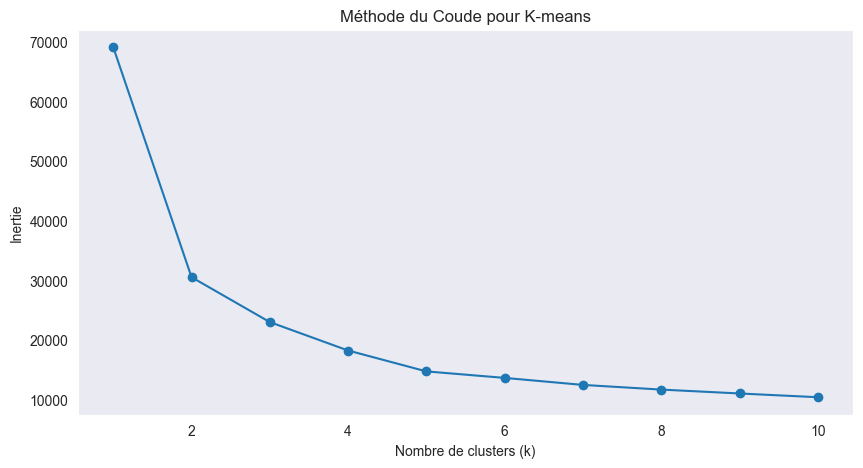

TypeError: agg function failed [how->mean,dtype->object]

In [292]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Charger les données filtrées
df = pd.read_csv('code_postal/prepared_code_postal_25000_2023.csv')

# Vérifier les valeurs manquantes après traitement
print(df[colonnes_numeriques].isnull().sum())  # Devrait afficher 0

# Sélectionner les colonnes pertinentes pour la segmentation
X = df[colonnes_numeriques]

# Normalisation des données
scaler = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(X)

# Détermination du nombre optimal de clusters (k)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=51)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation de la méthode du coude
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Méthode du Coude pour K-means')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.grid()
plt.show()

# Choisir k (par exemple, 3) après avoir analysé le graphique
k = 4

# Appliquer K-means
kmeans = KMeans(n_clusters=k, n_init=10, max_iter=400, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.to_csv('segmented_code_postal_25000_2023.csv', index=False)


# Afficher les segments
print(df.groupby('Cluster').mean())

In [293]:
cluster_stats = df.groupby('Cluster')['Valeur fonciere'].agg(['mean', 'median', 'std', 'min', 'max'])
print(cluster_stats)

             mean    median       std       min       max
Cluster                                                  
0       -0.042639 -0.015055  0.844804 -5.199338  1.786156
1       -0.184034 -0.174006  0.819771 -2.256745  2.211127
2        0.073361  0.417002  2.012742 -5.199338  5.199338
3        0.599858  0.830234  1.893095 -5.199338  5.199338


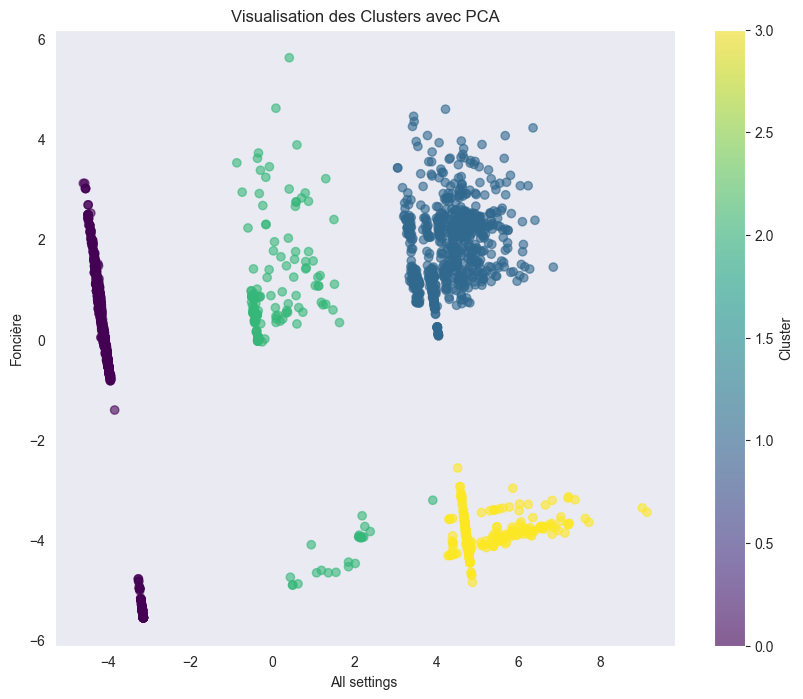

In [294]:
# Visualisation des clusters
# Réduction de la dimensionnalité avec PCA pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame pour la visualisation
df_pca = pd.DataFrame(data=X_pca, columns=['Composante 1', 'Composante 2'])
df_pca['Cluster'] = df['Cluster']

# Tracer les clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['Composante 1'], df_pca['Composante 2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Visualisation des Clusters avec PCA')
plt.xlabel('All settings ')
plt.ylabel('Foncière')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [295]:

cluster_stats = df.groupby('Cluster')['Valeur fonciere'].agg(['mean', 'median', 'std', 'min', 'max'])
print(cluster_stats)


             mean    median       std       min       max
Cluster                                                  
0       -0.042639 -0.015055  0.844804 -5.199338  1.786156
1       -0.184034 -0.174006  0.819771 -2.256745  2.211127
2        0.073361  0.417002  2.012742 -5.199338  5.199338
3        0.599858  0.830234  1.893095 -5.199338  5.199338


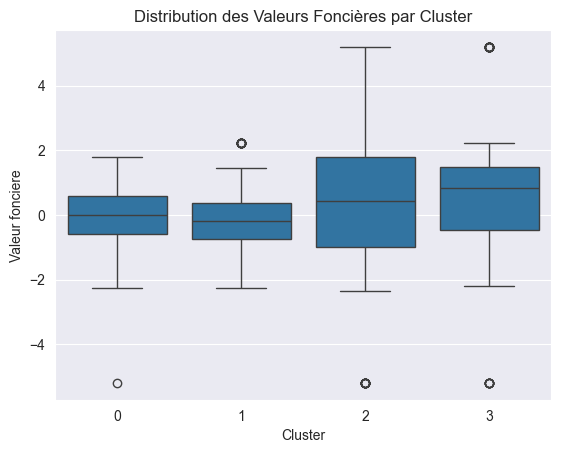

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Valeur fonciere', data=df)
plt.title('Distribution des Valeurs Foncières par Cluster')
plt.show()

# Partie 4 : Modélisation par Régression Linéaire 


In [341]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

file_path = 'code_postal/segmented_code_postal_25000_2023.csv'
data = pd.read_csv(file_path)

models = {}
for segment in data['Cluster'].unique():
    segment_data = data[data['Cluster'] == segment]

    # Variables d'entrée et cible
    X = segment_data[['Surface reelle bati', 'Surface terrain', 'Nombre pieces principales']]
    y = segment_data['Valeur fonciere']

    # Séparer en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Créer et entraîner le modèle de régression linéaire
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Enregistrer le modèle et ses performances
    models[segment] = model

    # Prédiction et évaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Affichage des coefficients et de l'évaluation
    print(f"Segment {segment} - Coefficients: {model.coef_}, Intercept: {model.intercept_}, MSE: {mse}")

    # Sauvegarder les coefficients et l'évaluation
    with open(f'model_segment{segment}.txt', 'w') as f:
        f.write(f"Coefficients: {model.coef_}\nIntercept: {model.intercept_}\nMSE: {mse}\n")

Segment 3 - Coefficients: [-0.07338696  0.25061512  0.33346167], Intercept: 0.5402008522652381, MSE: 4.402272295805123
Segment 2 - Coefficients: [0.22555986 0.14294169 0.03882185], Intercept: 0.10323091242606061, MSE: 4.405148242450383
Segment 1 - Coefficients: [ 0.83095664  0.         -0.1470599 ], Intercept: -0.6666223906017215, MSE: 0.507227732679172
Segment 0 - Coefficients: [ 0.00239884 -0.47204128  0.00239884], Intercept: 0.017573951357375165, MSE: 0.7726580179042912


# Partie 5


In [342]:
import numpy as np
import pandas as pd

# Load the new data
df_2024 = pd.read_csv('code_postal/prepared_code_postal_25000_2024.csv')

# Ensure relevant columns are in numerical format
numerical_cols = ['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales']

# Convert columns to numeric, replacing commas if necessary
for col in numerical_cols:
    df_2024[col] = df_2024[col].astype(str).str.replace(',', '.')
    df_2024[col] = pd.to_numeric(df_2024[col], errors='coerce')

# Fill missing values if necessary
df_2024[numerical_cols] = df_2024[numerical_cols].fillna(df_2024[numerical_cols].mean())

# Extract features for prediction
X_new = df_2024[numerical_cols]

# Specify the segment file you want to use
segment_file_path = 'segment/model_segment1.txt'  # Change this path as needed

# Read the segment data directly from the file
with open(segment_file_path, 'r') as file:
    lines = file.readlines()
    
    # Extract coefficients
    coeff_line = lines[0].strip()
    coefficients = np.fromstring(coeff_line.split(': ')[1].strip('[]'), sep=' ')  # Convert string to array
    
    # Extract intercept
    intercept_line = lines[1].strip()
    intercept = float(intercept_line.split(': ')[1])
    
    # Extract MSE (if needed)
    mse_line = lines[2].strip()
    mse = float(mse_line.split(': ')[1])

# Display the extracted values
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("MSE:", mse)

# Calculate predictions using the extracted coefficients and intercept
predictions = X_new.dot(coefficients) + intercept

# Add predictions to the DataFrame
df_2024['Predicted Valeur fonciere'] = predictions

# Save the results to a new CSV file
df_2024.to_csv('predicted_code_postal_25000_2024.csv', index=False)

print("Predictions have been successfully added and saved to 'predicted_code_postal_25000_2024.csv'.")

Coefficients: [ 0.83095664  0.         -0.1470599 ]
Intercept: -0.6666223906017215
MSE: 0.507227732679172
Predictions have been successfully added and saved to 'predicted_code_postal_25000_2024.csv'.


In [343]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the predicted data
df_2024 = pd.read_csv('predicted_code_postal_25000_2024.csv')

# Ensure that 'Valeur fonciere' and 'Predicted Valeur fonciere' are in numeric format
df_2024['Valeur fonciere'] = df_2024['Valeur fonciere'].astype(str).str.replace(',', '.').astype(float)
df_2024['Predicted Valeur fonciere'] = df_2024['Predicted Valeur fonciere'].astype(float)

# Extract actual and predicted values
actual_values = df_2024['Valeur fonciere'].tolist()
predicted_values = df_2024['Predicted Valeur fonciere'].tolist()

# Initialize variables for MSE calculation
n = len(actual_values)
squared_errors = 0

# Calculate squared differences
for i in range(n):
    error = actual_values[i] - predicted_values[i]
    squared_errors += error ** 2

# Calculate Mean Squared Error
mse = squared_errors / n

#print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df_2024['Valeur fonciere'], df_2024['Predicted Valeur fonciere'])
print('Mean Absolute Error: ', mae)

# Calculate R-squared score
r2 = r2_score(df_2024['Valeur fonciere'], df_2024['Predicted Valeur fonciere'])
print('R-squared Score: ', r2)

# Define a tolerance level (e.g., 20% for testing)
tolerance = 0.20

# Calculate accuracy based on tolerance
correct_predictions = ((df_2024['Valeur fonciere'] * (1 - tolerance)) <= df_2024['Predicted Valeur fonciere']) & \
                      (df_2024['Predicted Valeur fonciere'] <= (df_2024['Valeur fonciere'] * (1 + tolerance)))

accuracy = correct_predictions.mean() * 100  # Convert to percentage
print('Accuracy within 20% tolerance: ', accuracy)

Mean Absolute Error:  63650.71068739973
R-squared Score:  0.969513575358531
Accuracy within 20% tolerance:  99.12023460410558
